**The following notebook is to describe the results from the test due to Case 1 with 3 years for calibration.**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import sys
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
directory_name = 'test.demo'

In [4]:
output_data = pd.read_csv('test.demo/observations.dat',skiprows=88,sep=' ')
output_data.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
0,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.164877,0.164877,0.164877,0.165884,0.165884,0.165884,0.165884
1,86400.0,259.136901,262.535868,265.147149,267.394073,269.696063,270.095452,270.141342,0.164562,0.164595,0.164637,0.165872,0.165881,0.165883,0.165884
2,172800.0,258.197106,260.855646,263.138526,265.497559,268.847926,269.857438,270.071454,0.164555,0.164576,0.164603,0.165869,0.165876,0.165882,0.165883
3,259200.0,257.479951,259.815014,261.891707,264.200052,268.024330,269.519566,269.940783,0.164550,0.164567,0.164587,0.165867,0.165874,0.165880,0.165882
4,345600.0,256.943673,259.080611,261.016618,263.251096,267.286315,269.131162,269.758407,0.164547,0.164561,0.164578,0.165867,0.165872,0.165878,0.165881


In [5]:
len(output_data)

366

In [6]:
measured_data = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Validate_outputdata_2019.csv',sep='\t', index_col='TIMESTAMP')
measured_data.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
TIMESTAMP,,,,,,,,,,,,,,,
2019-01-01,6.423472,7.538778,8.086528,8.609306,5.178132,3.371944,4.453563,-16.513194,-16.174306,-14.436319,-13.870417,-12.438125,-10.238264,-7.024076,-5.411375
2019-01-02,6.463458,7.577208,8.120833,8.615139,5.161292,3.348535,4.425410,-15.900486,-15.641042,-13.958611,-13.513819,-12.308611,-10.330208,-7.259861,-5.616632
2019-01-03,6.458368,7.578368,8.129028,8.620347,5.153854,3.329340,4.399389,-16.385139,-15.791528,-14.019931,-13.464583,-12.218889,-10.348611,-7.443604,-5.803431
2019-01-04,6.441076,7.562042,8.118333,8.615000,5.151160,3.313813,4.376812,-16.919028,-16.036181,-14.217222,-13.575208,-12.252083,-10.388333,-7.572201,-5.965312
2019-01-05,6.434840,7.551556,8.103681,8.597500,5.139132,3.301118,4.357840,-17.339306,-16.176042,-14.359722,-13.716250,-12.376875,-10.484514,-7.692111,-6.111090


In [7]:
output_data = output_data.iloc[1:] # Dropping the first row as we need to match the indices
output_data.index = measured_data.index

Text(0, 0.5, 'Temperature (K)')

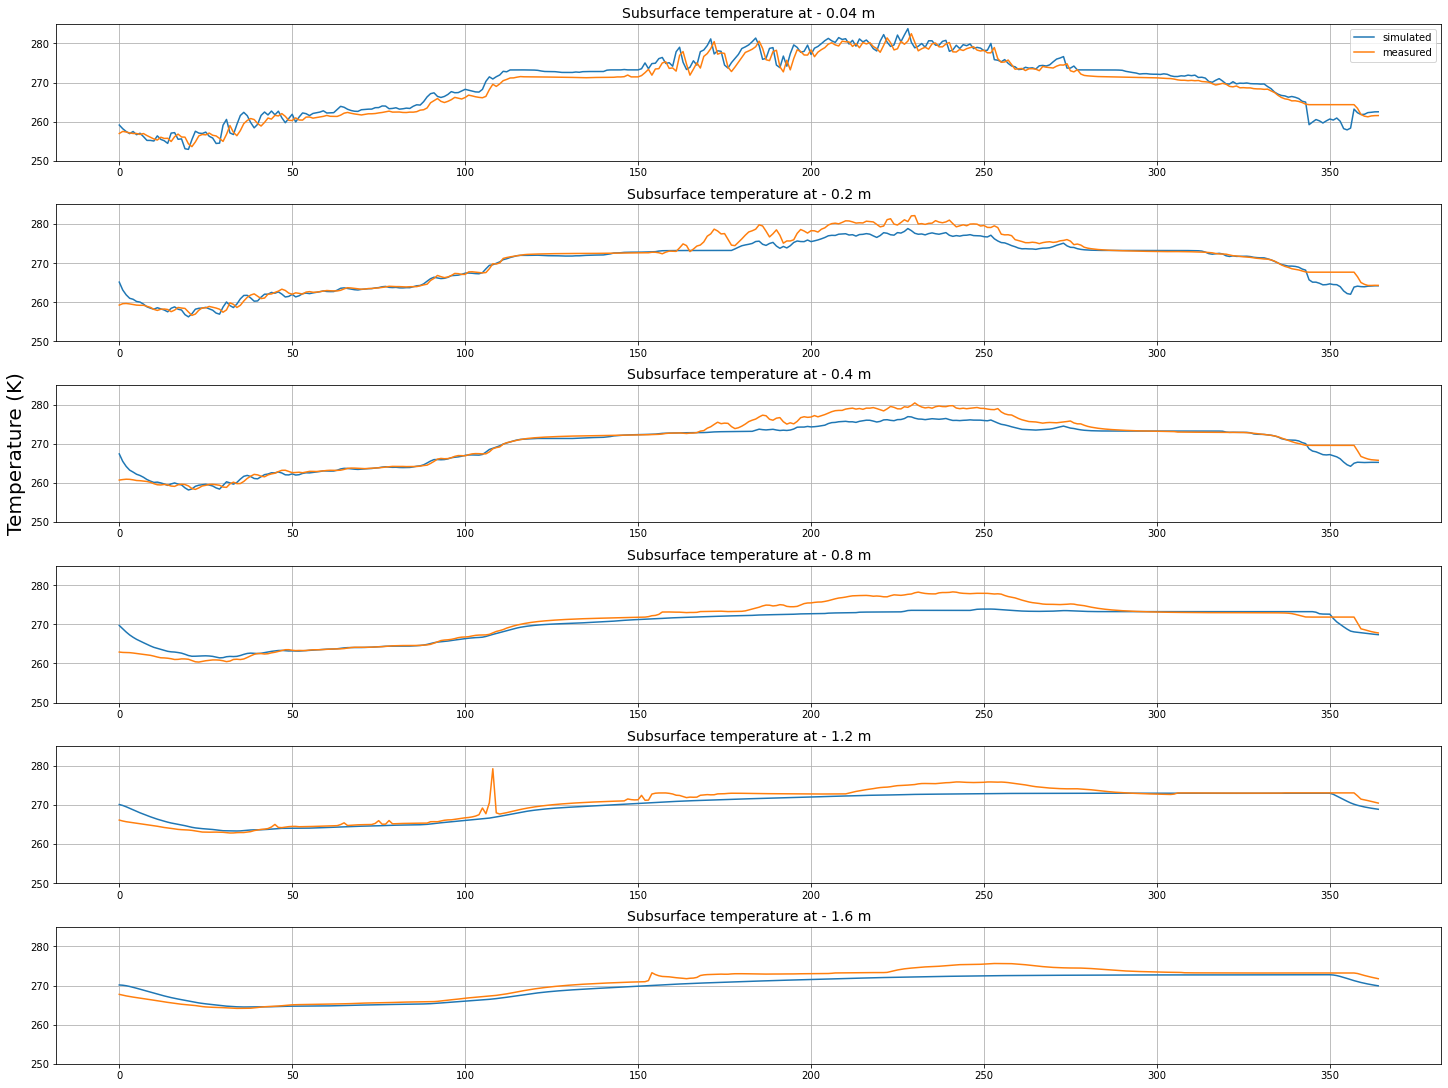

In [8]:
### Plotting the temperature 
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
        locals()['f2_ax'+str(j+1)].plot(np.arange(0,365,1), output_data[f'point -{depth} temperature [K]'].values, label='simulated')
        locals()['f2_ax'+str(j+1)].plot(np.arange(0,365,1), measured_data[f'Soil temperature at - {depth} m (°C)'].values+273.15, label='measured')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Subsurface temperature at - {depth} m', fontsize=14)
        f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

In [9]:
# Converting the simulated data to soil moisture (%)
porosity_peat = 0.80038117555001
porosity_mineral = 0.50705336935386


output_data['Soil moisture at - 0.04 m (%)'] = output_data['point -0.04 saturation liquid']*porosity_peat*100
output_data['Soil moisture at - 0.2 m (%)'] = output_data['point -0.2 saturation liquid']*porosity_peat*100
output_data['Soil moisture at - 0.4 m (%)'] = output_data['point -0.4 saturation liquid']*porosity_mineral*100
output_data['Soil moisture at - 0.8 m (%)'] = output_data['point -0.8 saturation liquid']*porosity_mineral*100

output_data['Soil moisture at - 1.2 m (%)'] = output_data['point -1.2 saturation liquid']*porosity_mineral*100
output_data['Soil moisture at - 1.6 m (%)'] = output_data['point -1.6 saturation liquid']*porosity_mineral*100

Text(0, 0.5, 'Temperature (K)')

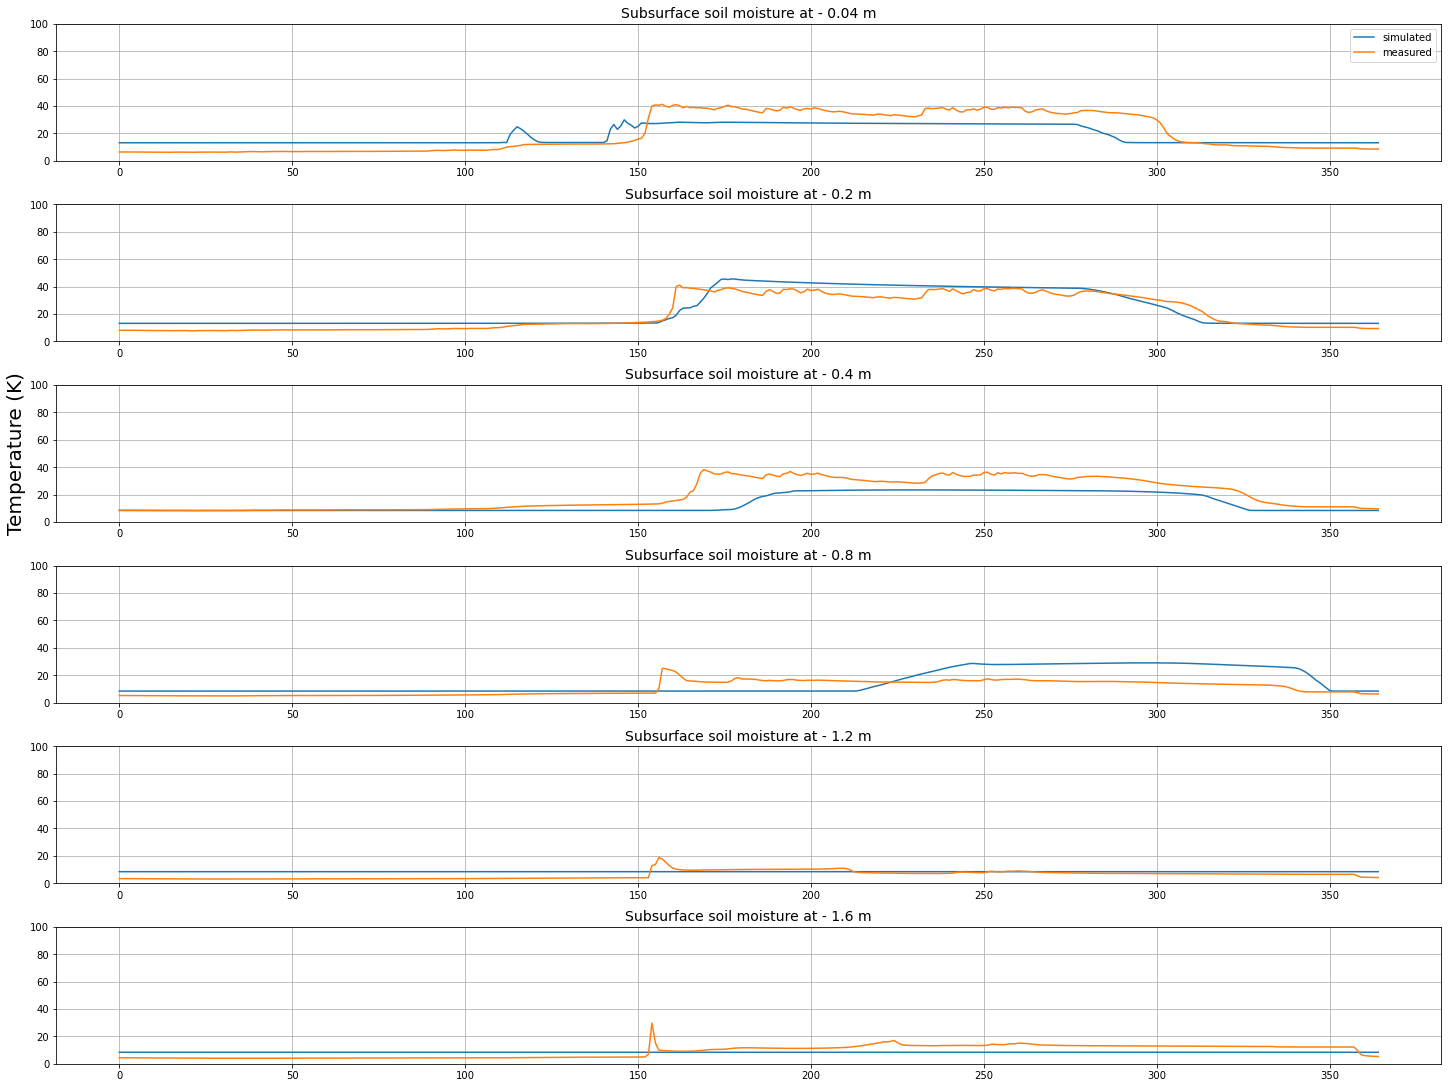

In [10]:
### Plotting the saturation of liquid
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil moisture at different depths [K]')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
        locals()['f2_ax'+str(j+1)].plot(np.arange(0,365,1), output_data[f'Soil moisture at - {depth} m (%)'].values, label='simulated')
        locals()['f2_ax'+str(j+1)].plot(np.arange(0,365,1), measured_data[f'Soil moisture at - {depth} m (%)'].values, label='measured')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Subsurface soil moisture at - {depth} m', fontsize=14)
        f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)